In [36]:
# 1. Importing the necessary libraries
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Reading the images
im1 = cv2.imread('/content/drive/MyDrive/CIS3/Assignments/First/Images/Haneda.jpg')  
im2 = cv2.imread('/content/drive/MyDrive/CIS3/Assignments/First/Images/LargeSize3.jpg') 

# 3. Converting the images to grayscale:
img1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

The next step creates a object from of SIFT class, using the member function create(). This class is used for extracting keypoints and computing descriptors using the SIFT algorithm by D. Lowe. The most important arguments are:
1. nOctaveLayers (3) -> How many layers we want in Image pyramid
2. contrastThreshold (0.04) -> Filters out weak features in low-contrast regions.The larger the threshold, the less features are produced by the detector.
3. sigma (1.6) -> The sigma of the Gaussian applied to the original image.

In [37]:
# 4. Initializing the SIFT detector:
sift = cv2.xfeatures2d.SIFT_create(nOctaveLayers = 3, contrastThreshold = 0.04, sigma = 1.6 )


Next, the method detectAndCompute() is used to detect keypoints and their respective descriptor. Each keypoint is a special structure which has many attributes like its (x,y) coordinates, size of the meaningful neighbourhood, angle which specifies its orientation, response that specifies strength of keypoints etc.

Here keypoints_1 will be a list of keypoints from image 1, descriptors_1 is a numpy array of shape (Number of Keypoints) x 128.

In [38]:
# 5. Detecting keypoints and computing descriptors:
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

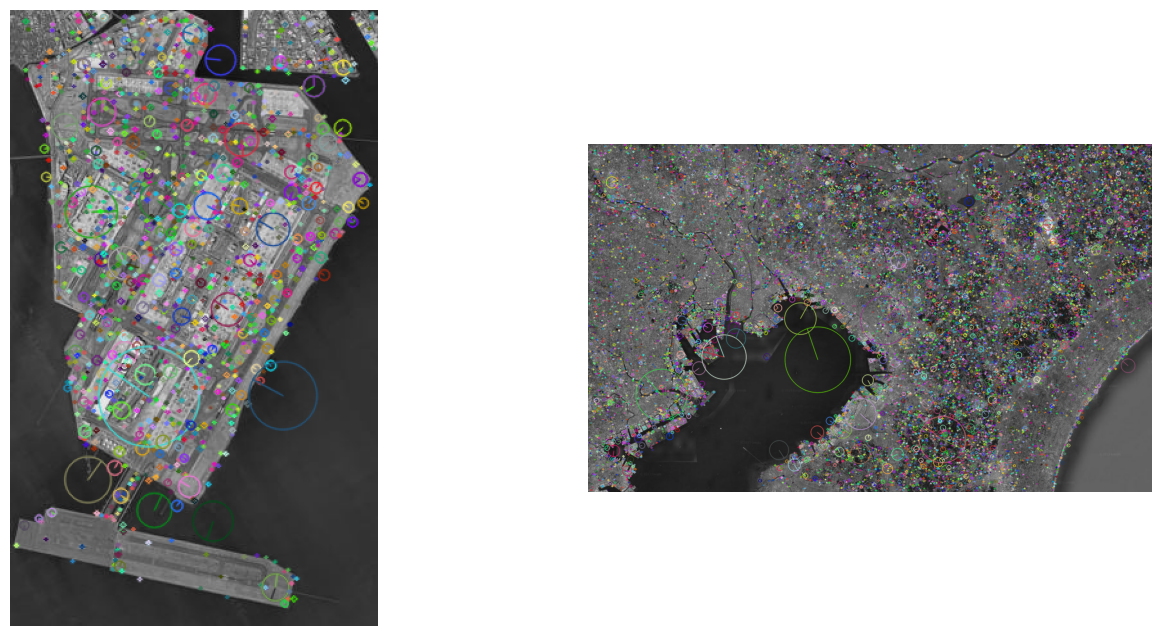

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

img1F = cv2.drawKeypoints(img1, keypoints_1, im1, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
ax[0].imshow(img1F)
ax[0].axis('off')

img2F = cv2.drawKeypoints(img2, keypoints_2, im2, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
ax[1].imshow(img2F)
ax[1].axis('off')

plt.show()

In this step a object of BFMatcher class is created using the member function 
create(). For each descriptor in the first set, this matcher finds the closest descriptor in the second set by trying each one (Brute-force descriptor matcher). The used arguments are:
1. normType -> How to compute the distances between every two features. NORM_L1 is the manhattan distance, and NORM_L2 is the euclidean distance.
2. crossCheck -> To check or not for the best matches in both ways. If B is the closest match for feature A, the tuple (A,B) is consider consistent pair only if A is also the closest match for feature

In [40]:
# 6. Initializing the Brute-force matcher:
bf = cv2.BFMatcher.create(normType = cv2.NORM_L1, crossCheck = True)


Next, the method match() is used to get the best matches in two images, using their descriptors. The distance between every two features (descriptors) is return. The lower, the better it is. Therefore, we sort them in ascending order to get the best matches first.

In [41]:
# 7. Performing feature matching:
matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)
print(len(matches))

685


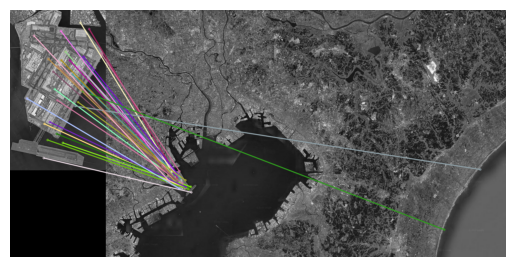

(<matplotlib.image.AxesImage at 0x7fc5398138e0>,
 (-0.5, 1479.5, 737.5, -0.5),
 None)

In [42]:
# 7. Drawing matched features:
img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:30], img2, flags=2, matchesThickness = 2)
plt.imshow(img3),plt.axis('off'),plt.show()

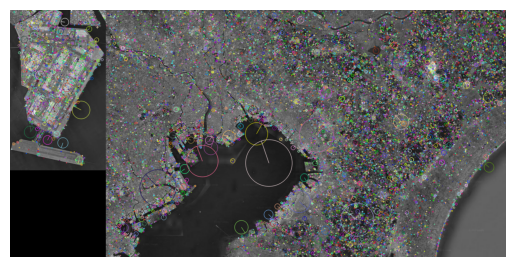

(<matplotlib.image.AxesImage at 0x7fc54944ae90>,
 (-0.5, 1479.5, 737.5, -0.5),
 None)

In [43]:
img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:0], img2, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, matchesThickness = 1)
plt.imshow(img3),plt.axis('off'),plt.show()